### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [3]:
# Any missing values?
reviews_na = reviews[reviews.isna().any(axis=1)]

reviews_na.shape

(0, 11)

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews.drop('language', inplace=True, axis=1)
reviews.drop('platform', inplace=True, axis=1)
# View column names.
reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv')

In [9]:
# Import new CSV file with Pandas.
reviews_df = pd.read_csv('reviews.csv')

# View DataFrame.
reviews_df

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

## 5. Linear regression

### 5a) spending vs loyalty

In [10]:
# Create new DataFrame
spending_loyalty = reviews_df[['spending_score', 'loyalty_points']].copy()

In [11]:
# Apply Pandas correlation method.
spending_loyalty.corr()

spending_score  loyalty_points
spending_score         1.00000         0.67231
loyalty_points         0.67231         1.00000

In [12]:
# Maximum vaue for Independent variable
spending_loyalty['spending_score'].max()

99

In [13]:
# Maximum vaue for Dependent variable
spending_loyalty['loyalty_points'].max()

6847

(0.0, 99.0)

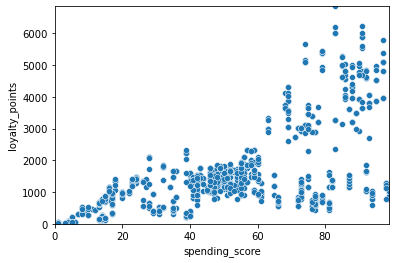

In [14]:
# Start with a visualisation BEFORE running linear regression.
sns.scatterplot(data=spending_loyalty,
               x='spending_score',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 6847)
plt.xlim(0, 99)

In [15]:
# Simple linear regression
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable).
# See if we can predict the loyalty points based on spending score
reg = np.polyfit(spending_loyalty['spending_score'],
                spending_loyalty['loyalty_points'],
                # Degree = 1, degree of polynomium, for SLR always 1.
                deg = 1)

# View output.
reg

array([ 33.06169326, -75.05266293])

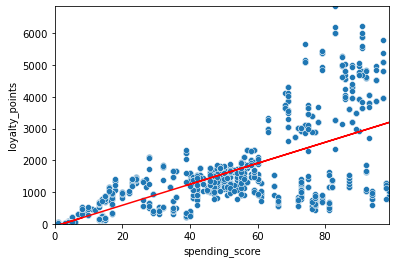

In [16]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, spending_loyalty['spending_score'])

# View the previous scatterplot.
sns.scatterplot(data=spending_loyalty,
               x='spending_score',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 6847)
plt.xlim(0, 99)

# Add the trendline.
plt.plot(spending_loyalty['spending_score'],
         trend,
         color='red')

In [17]:
# Simple linear regression: OLS method
# Dependent variable.
y = spending_loyalty['loyalty_points'] 

# Independent variable.
x = spending_loyalty['spending_score'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = spending_loyalty).fit()

# Print the regression table.
test.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        11:28:52   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [19]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = (-75.0526) + 33.0616* spending_loyalty['spending_score']

# View the output.
y_pred

0       1214.3498
1       2602.9370
2        123.3170
3       2470.6906
4       1247.4114
          ...    
1995    2206.1978
1996     189.4402
1997    2933.5530
1998     453.9330
1999     189.4402
Name: spending_score, Length: 2000, dtype: float64

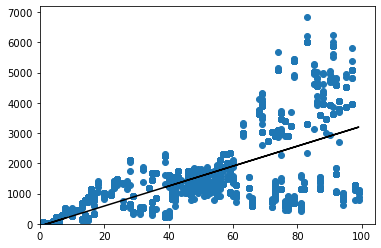

In [20]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [21]:
# Create new DataFrame
remuneration_loyalty = reviews_df[['remuneration', 'loyalty_points']].copy()

In [22]:
# Apply Pandas correlation method.
remuneration_loyalty.corr()

remuneration  loyalty_points
remuneration        1.000000        0.616065
loyalty_points      0.616065        1.000000

In [23]:
# Maximum vaue for Independent variable
remuneration_loyalty['remuneration'].max()

112.34

(0.0, 112.34)

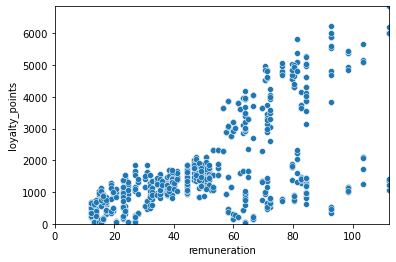

In [24]:
# Start with a visualisation BEFORE running linear regression.
sns.scatterplot(data=remuneration_loyalty,
               x='remuneration',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 6847)
plt.xlim(0, 112.34)

In [25]:
# Simple linear regression
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable).
# See if we can predict the loyalty points based on remuneration
reg = np.polyfit(remuneration_loyalty['remuneration'],
                remuneration_loyalty['loyalty_points'],
                # Degree = 1, degree of polynomium, for SLR always 1.
                deg = 1)

# View output.
reg

array([ 34.18782549, -65.6865128 ])

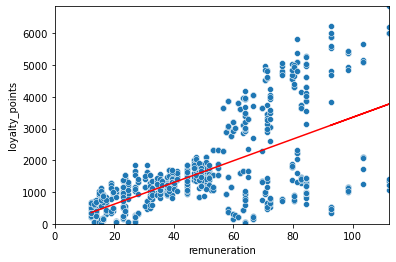

In [26]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, remuneration_loyalty['remuneration'])

# View the previous scatterplot.
sns.scatterplot(data=remuneration_loyalty,
               x='remuneration',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 6847)
plt.xlim(0, 112.34)

# Add the trendline.
plt.plot(remuneration_loyalty['remuneration'],
         trend,
         color='red')

In [27]:
# Simple linear regression: OLS method
# Dependent variable.
y = remuneration_loyalty['loyalty_points'] 

# Independent variable.
x = remuneration_loyalty['remuneration'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = remuneration_loyalty).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        11:28:53   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [29]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878* remuneration_loyalty['remuneration']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

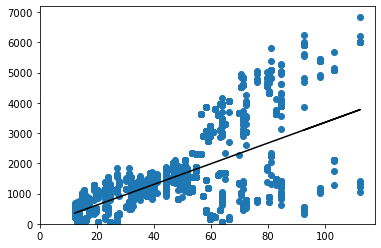

In [30]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [31]:
# Create new DataFrame
age_loyalty = reviews_df[['age', 'loyalty_points']].copy()

In [32]:
# Apply Pandas correlation method.
age_loyalty.corr()

age  loyalty_points
age             1.000000       -0.042445
loyalty_points -0.042445        1.000000

In [33]:
# Maximum vaue for Independent variable
age_loyalty['age'].max()

72

(0.0, 72.0)

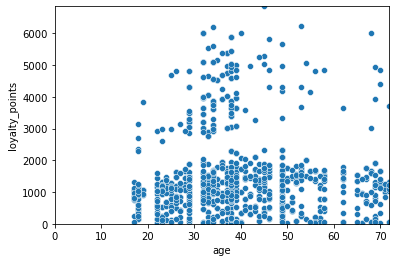

In [34]:
# Start with a visualisation BEFORE running linear regression.
sns.scatterplot(data=age_loyalty,
               x='age',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 6847)
plt.xlim(0, 72)

In [35]:
# Simple linear regression
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable).
# See if we can predict the loyalty points based on age
reg = np.polyfit(age_loyalty['age'],
                age_loyalty['loyalty_points'],
                # Degree = 1, degree of polynomium, for SLR always 1.
                deg = 1)

# View output.
reg

array([  -4.01280515, 1736.5177394 ])

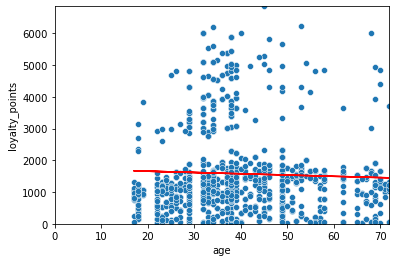

In [36]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, age_loyalty['age'])

# View the previous scatterplot.
sns.scatterplot(data=age_loyalty,
               x='age',
               y='loyalty_points')

# Set axis values.
plt.ylim(0, 6847)
plt.xlim(0, 72)

# Add the trendline.
plt.plot(age_loyalty['age'],
         trend,
         color='red')

In [37]:
# Simple linear regression: OLS method
# Dependent variable.
y = age_loyalty['loyalty_points'] 

# Independent variable.
x = age_loyalty['age'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = age_loyalty).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 19 Dec 2022   Prob (F-statistic):             0.0577
Time:                        11:28:53   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [39]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = (1736.5177) + -4.012805* age_loyalty['age']

# View the output.
y_pred

0       1664.287210
1       1644.223185
2       1648.235990
3       1636.197575
4       1604.095135
           ...     
1995    1588.043915
1996    1563.967085
1997    1600.082330
1998    1600.082330
1999    1608.107940
Name: age, Length: 2000, dtype: float64

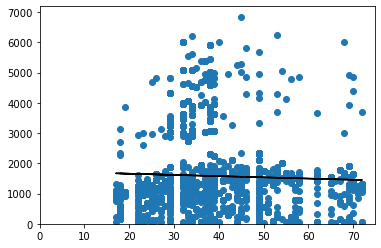

In [40]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [41]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [42]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv')

# View DataFrame.
df2

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [43]:
# Drop unnecessary columns.
df_rem_spend = df2.drop(columns=['Unnamed: 0', 'gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df_rem_spend

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

In [44]:
# Explore the data.
df_rem_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [45]:
# Descriptive statistics.
df_rem_spend.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

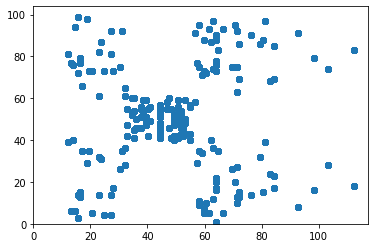

In [46]:
# Create a scatterplot with Seaborn.
plt.scatter(x="remuneration", y="spending_score", data=df_rem_spend)

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

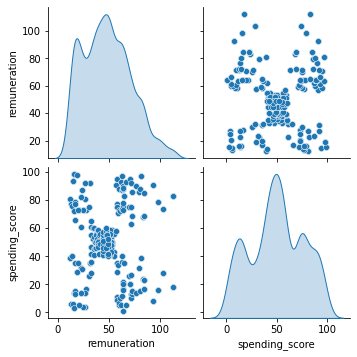

In [47]:
# Create a pairplot with Seaborn.
x = df_rem_spend[['remuneration', 'spending_score']]

sns.pairplot(df_rem_spend,
             vars=x,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

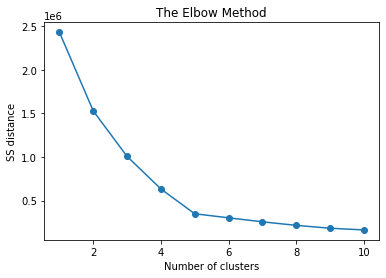

In [48]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

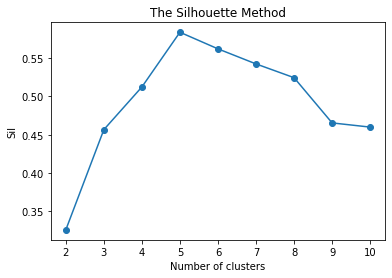

In [49]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

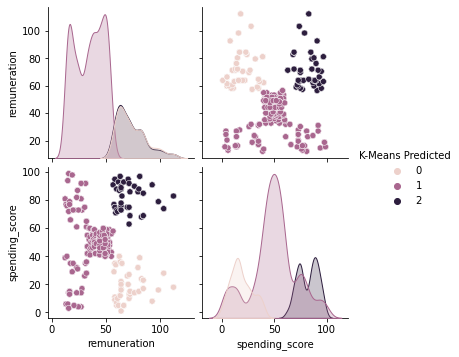

In [50]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

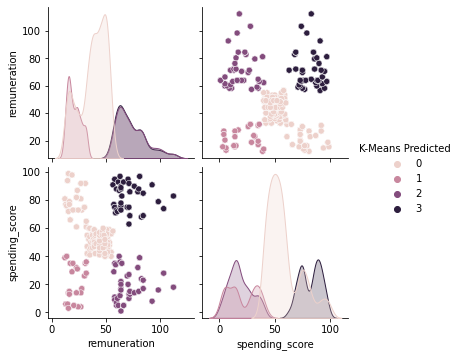

In [51]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

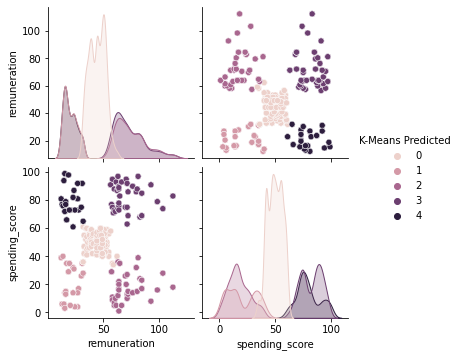

In [52]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

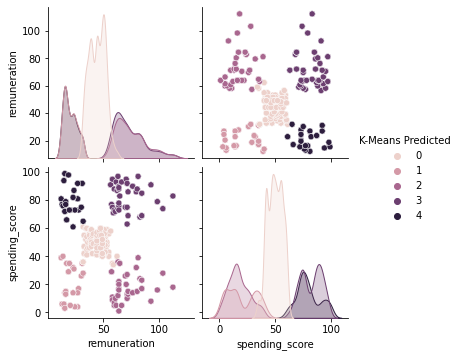

In [53]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [54]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [55]:
# Visualising the clusters.
# View the K-Means predicted.
print(x.head())


   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

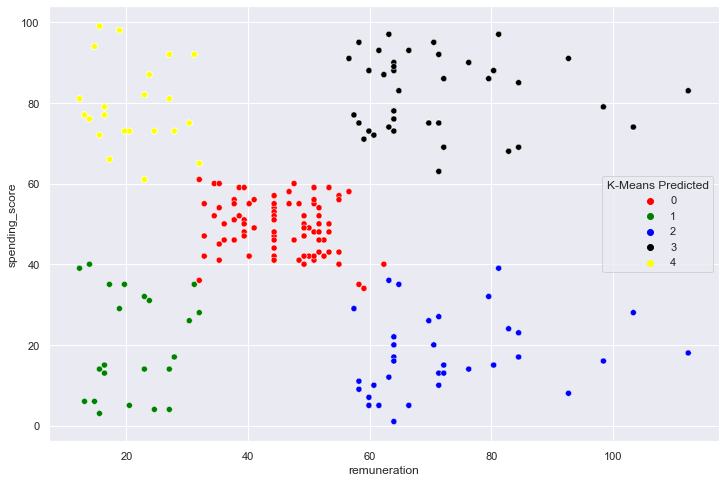

In [56]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x="remuneration", 
                y ="spending_score",
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'yellow'])


## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [57]:
# Install wordcloud
!pip install wordcloud

!pip install textblob

In [58]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [59]:
# Load the data set as df3.
df3 = pd.read_csv('reviews.csv')

# View DataFrame.
df3

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [60]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [61]:
# Keep necessary columns. Drop unnecessary columns.
df_nlp = df3.drop(columns=['Unnamed: 0', 'gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product'])


# View DataFrame.
df_nlp

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [62]:
# Determine if there are any missing values.
df_nlp_na = df_nlp[df_nlp.isna().any(axis=1)]

df_nlp_na.shape

(0, 2)

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [63]:
# Review: Change all to lower case and join with a space.
df_nlp['review'] = df_nlp['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [64]:
# View the result
df_nlp['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [65]:
# Summary: Change all to lower case and join with a space.
df_nlp['summary'] = df_nlp['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [66]:
# View the result
df_nlp['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [67]:
# Replace all the puncuations in review column.
df_nlp['review'] = df_nlp['review'].str.replace('[^\w\s]','')

# View output
df_nlp['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [68]:
# Replace all the puncuations in summary column.
df_nlp['summary'] = df_nlp['summary'].str.replace('[^\w\s]','')

# View output
df_nlp['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

2c) Drop duplicates in both columns

In [69]:
# Check review columns for duplicates
df_nlp.review.duplicated().sum()

50

In [70]:
# Check summary columns for duplicates
df_nlp.summary.duplicated().sum()

649

In [71]:
# Drop duplicates in review column
df_clean = df_nlp.drop_duplicates(subset=['review'])

# View DataFrame.
df_clean.reset_index(inplace=True)
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1950 non-null   int64 
 1   review   1950 non-null   object
 2   summary  1950 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.8+ KB


In [72]:
# Drop duplicates in summary column
df_clean = df_clean.drop_duplicates(subset=['summary'])

# View DataFrame.
df_clean.reset_index(inplace=True)
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_0  1349 non-null   int64 
 1   index    1349 non-null   int64 
 2   review   1349 non-null   object
 3   summary  1349 non-null   object
dtypes: int64(2), object(2)
memory usage: 42.3+ KB


## 3. Tokenise and create wordclouds

In [73]:
# Create new DataFrame (copy DataFrame).
df_clean2 = df_clean.drop(columns=['level_0', 'index'])

# View DataFrame.
df_clean2

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1344  this is a fun card game for people who like wo...   
1345  fun for the family just make certain you agree...   
1346  great game to keep the mind active we play it ...   
1347  we are retired and find this a great way to st...   
1348  the perfect word game for mixed ages with mom ...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1344  this is a fun card game for people who like words  
1345  sort of a card game equivalent of scrabble and...  
1346                 great game to keep the mind active  
1347                                  a great mind game  
1348      the perfect word game for mixed ages with mom  

[1349 rows x 2 columns]

In [74]:
# Apply tokenisation to both review column.
df_token_review = [word_tokenize(_) for _ in df_clean2.review]

# View DataFrame.
df_token_review

[['when',
  'it',
  'comes',
  'to',
  'a',
  'dms',
  'screen',
  'the',
  'space',
  'on',
  'the',
  'screen',
  'itself',
  'is',
  'at',
  'an',
  'absolute',
  'premium',
  'the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art',
  'as',
  'well',
  'makes',
  'it',
  'completely',
  'useless',
  'the',
  'only',
  'reason',
  'that',
  'i',
  'gave',
  'it',
  '2',
  'stars',
  'and',
  'not',
  '1',
  'was',
  'that',
  'technically',
  'speaking',
  'it',
  'can',
  'at',
  'least',
  'still',
  'stand',
  'up',
  'to',
  'block',
  'your',
  'notes',
  'and',
  'dice',
  'rolls',
  'other',
  'than',
  'that',
  'it',
  'drops',
  'the',
  'ball',
  'completely'],
 ['an',
  'open',
  'letter',
  'to',
  'galeforce9',
  'your',
  'unpainted',
  'miniatures',
  'are',
  'very',
  'not',
  'bad',
  'your',
  'spell',
  'cards',
  'are',
  'great',
  'your',
 

In [75]:
# Apply tokenisation to both summary column.
df_token_summary = [word_tokenize(_) for _ in df_clean2.summary]

# View DataFrame.
df_token_summary

[['the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art'],
 ['another',
  'worthless',
  'dungeon',
  'masters',
  'screen',
  'from',
  'galeforce9'],
 ['pretty', 'but', 'also', 'pretty', 'useless'],
 ['five', 'stars'],
 ['money', 'trap'],
 ['best', 'gm', 'screen', 'ever'],
 ['great', 'but', 'could', 'be', 'even', 'better'],
 ['another',
  'missed',
  'opportunity',
  'not',
  'a',
  'value',
  'add',
  'to',
  'the',
  'product',
  'line'],
 ['love', 'the', 'map'],
 ['not', 'a', 'general', 'dm', 'screen'],
 ['very', 'weak', 'game'],
 ['fell', 'completely', 'flat'],
 ['good', 'book'],
 ['buckley', 'was', 'a', 'card', 'mommer'],
 ['very', 'advanced', 'but', 'as', 'good', 'as', 'it', 'gets'],
 ['you', 'better', 'know', 'what', 'youre', 'getting', 'into'],
 ['dont', 'bother'],
 ['the', 'worst', 'value', 'ive', 'ever', 'seen'],
 ['not', 'enough', 'product'],
 ['good',

In [76]:
# String all the review text together in a single variable.
# Create an empty string variable.
all_review = ''
for i in range(df_clean2.shape[0]):
    # Add each comment.
    all_review = all_review + df_clean2['review'][i]

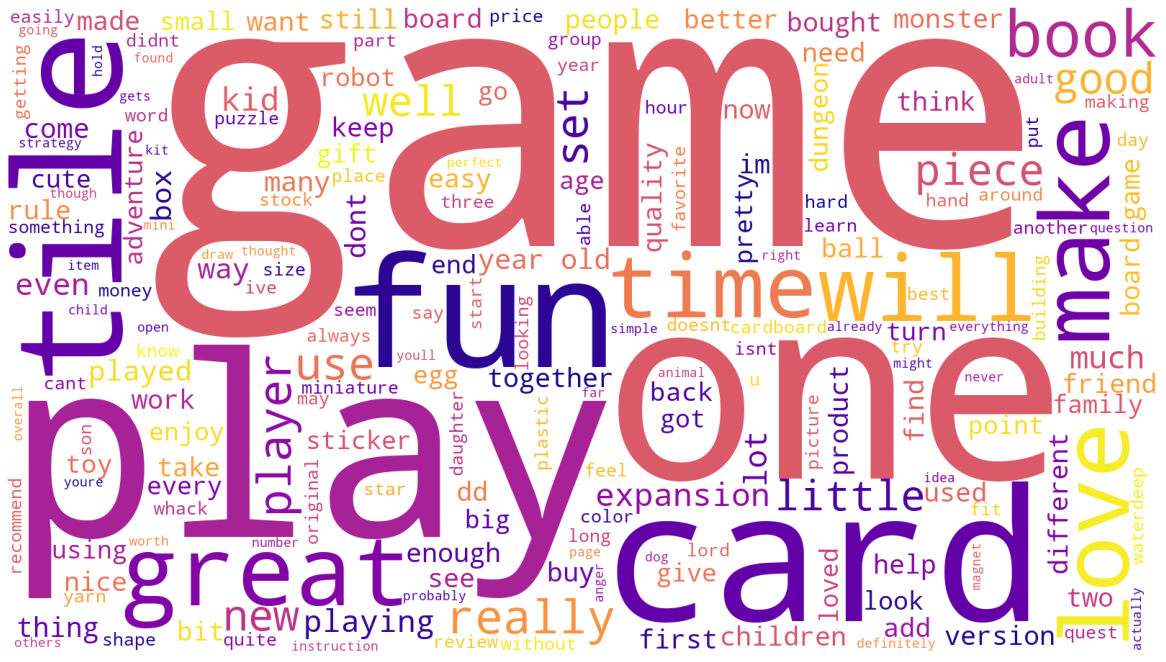

In [77]:
# Review - Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_review) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [78]:
# String all the summary text together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(df_clean2.shape[0]):
    # Add each comment.
    all_summary = all_summary + df_clean2['summary'][i]

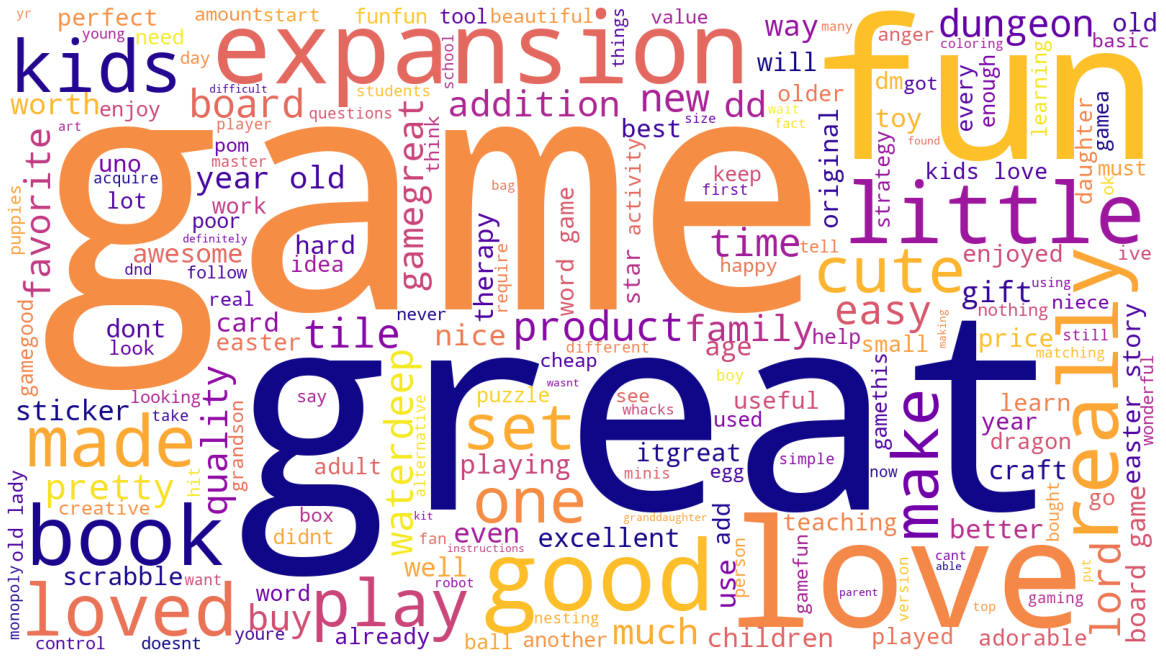

In [79]:
# Summary - Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_summary) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [80]:
# Determine the frequency distribution in review.
# Import the FreqDist class.
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist()
for word in word_tokenize(all_review):
    fdist[word.lower()] += 1

# Preview data.
fdist

FreqDist({'the': 4938, 'and': 2934, 'to': 2843, 'a': 2796, 'of': 2259, 'it': 1748, 'i': 1669, 'is': 1590, 'this': 1357, 'for': 1352, ...})

In [81]:
# Determine the frequency distribution in summary.
# Import the FreqDist class.
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdists = FreqDist()
for word in word_tokenize(all_summary):
    fdists[word.lower()] += 1

# Preview data.
fdists

FreqDist({'for': 224, 'the': 222, 'to': 190, 'a': 184, 'game': 162, 'and': 161, 'of': 131, 'is': 101, 'great': 100, 'it': 88, ...})

### 4b) Remove alphanumeric characters and stopwords

In [82]:
# Delete all the alpanum in review
all_review = [word for word in all_review if word.isalnum()]


In [83]:
# Delete all the alpanum in summary
all_summary = [word for word in all_summary if word.isalnum()]

In [84]:
# Remove all the stopwords in review
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
fdist1 = [x for x in fdist if x.lower() not in english_stopwords]

# Define an empty string variable.
fdist_str = ''

for value in fdist1:
    # Add each filtered token word to the string.
    fdist_str = fdist_str + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcarty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
# Remove all the stopwords in summary
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
fdists1 = [x for x in fdists if x.lower() not in english_stopwords]

# Define an empty string variable.
fdists_str = ''

for value in fdists1:
    # Add each filtered token word to the string.
    fdists_str = fdists_str + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcarty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

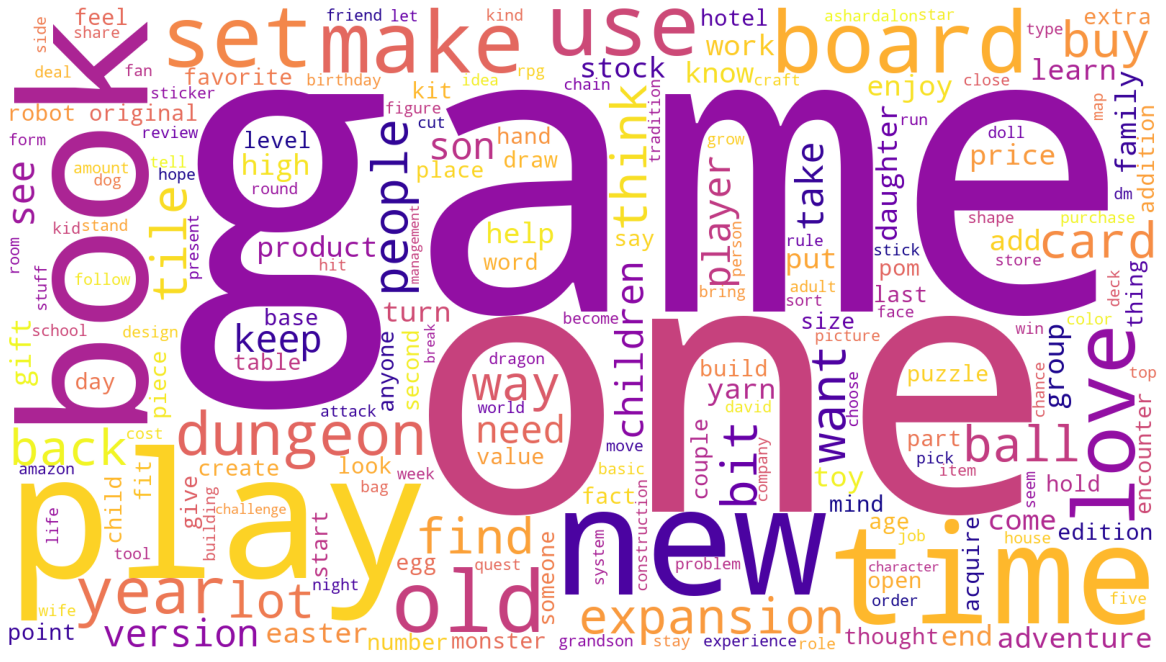

<Figure size 864x576 with 0 Axes>

In [86]:
# Create a wordcloud without stop words - review
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(fdist_str) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()
plt.savefig('review_wc.png')

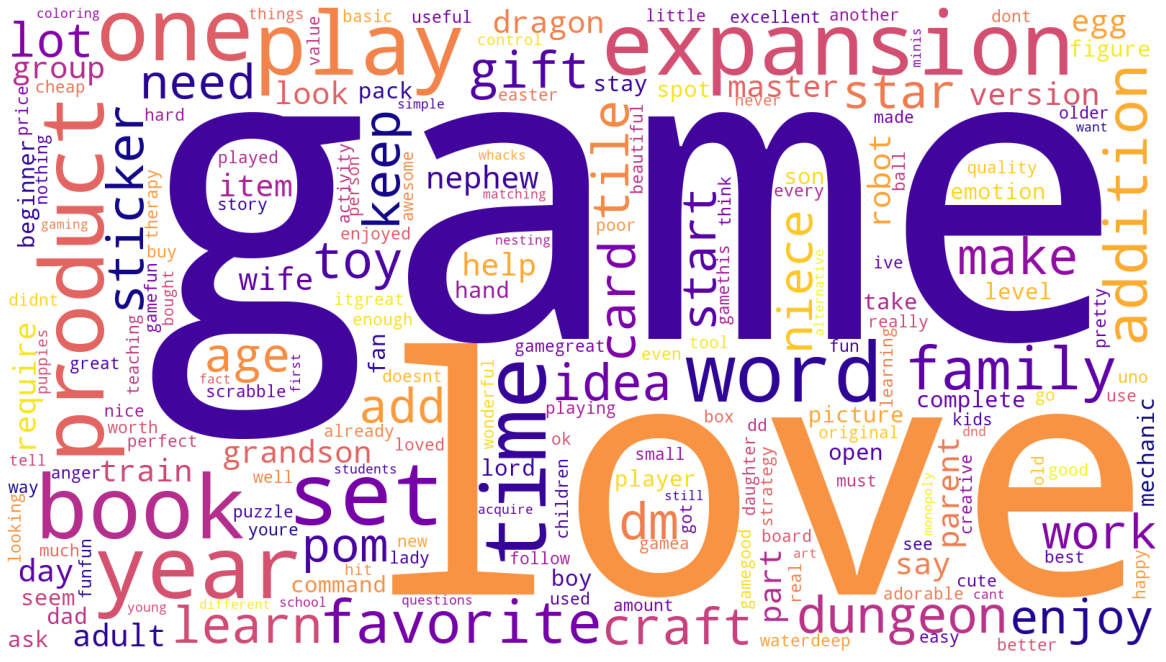

<Figure size 864x576 with 0 Axes>

In [87]:
# Create a wordcloud without stop words - summary
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(fdists_str) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()
plt.savefig('summary_wc.png')

### 4d) Identify 15 most common words and polarity

In [88]:
# Determine the 15 most common words in summary.
# View the frequency distribution.
fdist2 = FreqDist(all_summary)

# Preview the data.
fdist2


FreqDist({'e': 4279, 't': 3237, 'a': 3066, 'o': 2853, 'i': 2321, 'r': 2166, 'n': 2043, 's': 2020, 'l': 1669, 'd': 1436, ...})

In [89]:
# 15 most common words in review
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts1 = pd.DataFrame(Counter(fdist).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts1

Frequency
Word           
the        4938
and        2934
to         2843
a          2796
of         2259
it         1748
i          1669
is         1590
this       1357
for        1352
game       1303
with       1116
you        1078
in         1061
that        988

In [90]:
# Determine the 15 most common words in summary.
# View the frequency distribution.
fdist2 = FreqDist(all_summary)

# Preview the data.
fdist2

FreqDist({'e': 4279, 't': 3237, 'a': 3066, 'o': 2853, 'i': 2321, 'r': 2166, 'n': 2043, 's': 2020, 'l': 1669, 'd': 1436, ...})

In [91]:
# 15 most common words in summary
# Generate a DataFrame from Counter.
counts2 = pd.DataFrame(Counter(fdists).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts2.head(15)

Frequency
Word            
for          224
the          222
to           190
a            184
game         162
and          161
of           131
is           101
great        100
it            88
fun           84
this          78
but           73
with          70
i             55

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [92]:
# Provided function - Review
def generate_polarity(df_token_review):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [93]:
# Review
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

# Determine polarity of both columns. 
df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df_token_review}

# View output.
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mcarty\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


neg    neu    pos  \
when it comes to a dms screen the space on the ...  0.108  0.833  0.059   
an open letter to galeforce9 your unpainted min...  0.101  0.695  0.205   
nice art nice printing why two panels are fille...  0.136  0.711  0.153   
amazing buy bought it as a gift for our new dm ...  0.000  0.490  0.510   
as my review of gf9s previous screens these wer...  0.203  0.797  0.000   
...                                                   ...    ...    ...   
this is a fun card game for people who like wor...  0.000  0.678  0.322   
fun for the family just make certain you agree ...  0.000  0.655  0.345   
great game to keep the mind active we play it w...  0.000  0.721  0.279   
we are retired and find this a great way to sta...  0.000  0.693  0.307   
the perfect word game for mixed ages with mom p...  0.000  0.599  0.401   

                                                    compound  
when it comes to a dms screen the space on the ...   -0.6333  
an open letter to galeforce9 your unpainted min...    0.9404  
nice art nice printing why two panels are fille...   -0.0045  
amazing buy bought it as a gift for our new dm ...    0.8860  
as my review of gf9s previous screens these wer...   -0.6808  
...                                                      ...  
this is a fun card game for people who like wor...    0.8748  
fun for the family just make certain you agree ...    0.7845  
great game to keep the mind active we play it w...    0.9531  
we are retired and find this a great way to sta...    0.9178  
the perfect word game for mixed ages with mom p...    0.9137  

[1349 rows x 4 columns]

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

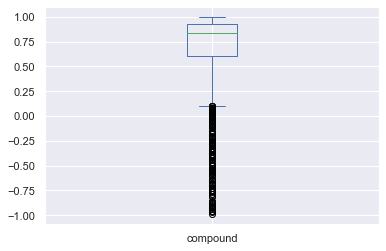

In [95]:
# Boxplot
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

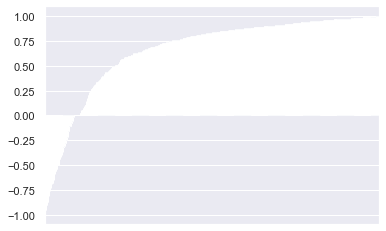

In [96]:
# Barplot.
_plot = polarity.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

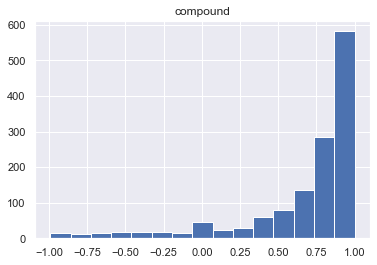

In [97]:
# Review: Create a histogram plot with bins = 15.

# Histogram of polarity
polarity['compound'].sort_values().reset_index().hist(bins=15)


In [98]:
# Provided function - Summary
def generate_polarity(df_token_summary):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [99]:
# Summary
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

# Determine polarity of both columns. 
df_polarity2 = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df_token_summary}

# View output.
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity2 = pd.DataFrame(df_polarity2).T

# View the DataFrame.
polarity2

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mcarty\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


neg    neu    pos  \
the fact that 50 of this space is wasted on art...  0.145  0.723  0.132   
another worthless dungeon masters screen from g...  0.326  0.674  0.000   
pretty but also pretty useless                      0.306  0.165  0.529   
five stars                                          0.000  1.000  0.000   
money trap                                          0.697  0.303  0.000   
...                                                   ...    ...    ...   
this is a fun card game for people who like words   0.000  0.580  0.420   
sort of a card game equivalent of scrabble and ...  0.000  0.763  0.237   
great game to keep the mind active                  0.000  0.424  0.576   
a great mind game                                   0.000  0.328  0.672   
the perfect word game for mixed ages with mom       0.000  0.684  0.316   

                                                    compound  
the fact that 50 of this space is wasted on art...   -0.0711  
another worthless dungeon masters screen from g...   -0.4404  
pretty but also pretty useless                        0.4019  
five stars                                            0.0000  
money trap                                           -0.3182  
...                                                      ...  
this is a fun card game for people who like words     0.7003  
sort of a card game equivalent of scrabble and ...    0.4215  
great game to keep the mind active                    0.7783  
a great mind game                                     0.6249  
the perfect word game for mixed ages with mom         0.5719  

[1348 rows x 4 columns]

<AxesSubplot:>

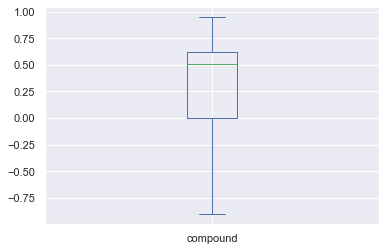

In [100]:
# Boxplot Summary
_plot = polarity2.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

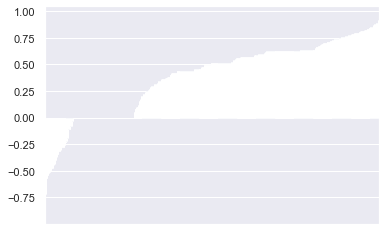

In [101]:
# Barplot - Summary
_plot = polarity2.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

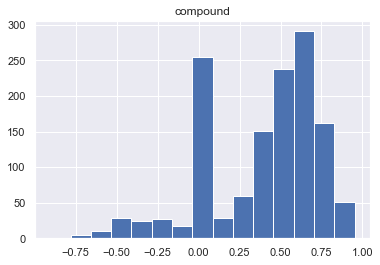

In [102]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
polarity2['compound'].sort_values().reset_index().hist(bins=15)


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [103]:
# Top 20 negative reviews.
polarity_neg = polarity.sort_values(by=['neg'], ascending=False)

# View output.
polarity_neg.head(20)

neg    neu    pos  \
incomplete kit very disappointing                   0.538  0.462  0.000   
a crappy cardboard ghost of the original hard t...  0.487  0.455  0.058   
got the product in damaged condition                0.367  0.633  0.000   
i bought this thinking it would be really fun b...  0.362  0.592  0.045   
not as easy as it looks                             0.325  0.675  0.000   
we really did not enjoy this game                   0.325  0.675  0.000   
hard to put together                                0.318  0.682  0.000   
my 8 yearold granddaughter and i were very frus...  0.318  0.613  0.069   
easytouse great for anger management groups         0.314  0.339  0.347   
its ok but loses its luster quickly                 0.309  0.524  0.168   
smaller than we thought kind of disappointed in it  0.298  0.702  0.000   
i really like this game it helps kids recognize...  0.287  0.463  0.250   
its uno with questions about anger its an okay ...  0.287  0.671  0.042   
its really uno type game but anger control stuf...  0.285  0.592  0.123   
they were ok but not really considered it a boo...  0.283  0.619  0.099   
horrible nothing more to say would give zero st...  0.259  0.741  0.000   
cute idea horrible execution if you want your c...  0.257  0.622  0.121   
very fun game to use with kids working on handl...  0.245  0.564  0.191   
these are nice enough but probably not worth th...  0.244  0.602  0.154   
this is horrible the directions are very hard f...  0.236  0.705  0.059   

                                                    compound  
incomplete kit very disappointing                    -0.5413  
a crappy cardboard ghost of the original hard t...   -0.9052  
got the product in damaged condition                 -0.4404  
i bought this thinking it would be really fun b...   -0.9520  
not as easy as it looks                              -0.3412  
we really did not enjoy this game                    -0.4389  
hard to put together                                 -0.1027  
my 8 yearold granddaughter and i were very frus...   -0.8674  
easytouse great for anger management groups           0.1027  
its ok but loses its luster quickly                  -0.3291  
smaller than we thought kind of disappointed in it   -0.5256  
i really like this game it helps kids recognize...   -0.2040  
its uno with questions about anger its an okay ...   -0.8126  
its really uno type game but anger control stuf...   -0.8668  
they were ok but not really considered it a boo...   -0.6082  
horrible nothing more to say would give zero st...   -0.5423  
cute idea horrible execution if you want your c...   -0.6997  
very fun game to use with kids working on handl...   -0.5652  
these are nice enough but probably not worth th...   -0.6706  
this is horrible the directions are very hard f...   -0.8067

In [104]:
# Top 20 negative summaries.
polarity2_neg = polarity2.sort_values(by=['neg'], ascending=False)

# View output.
polarity2_neg.head(20)

neg    neu  pos  compound
disappointing              1.000  0.000  0.0   -0.4939
meh                        1.000  0.000  0.0   -0.0772
boring                     1.000  0.000  0.0   -0.3182
disappointed               1.000  0.000  0.0   -0.4767
frustrating                1.000  0.000  0.0   -0.4404
defective poor qc          0.857  0.143  0.0   -0.7184
not great                  0.767  0.233  0.0   -0.5096
mad dragon                 0.762  0.238  0.0   -0.4939
no 20 sided die            0.753  0.247  0.0   -0.7269
damaged product            0.744  0.256  0.0   -0.4404
money trap                 0.697  0.303  0.0   -0.3182
faulty product             0.697  0.303  0.0   -0.3182
nothing special            0.693  0.307  0.0   -0.3089
wimpy magnets              0.655  0.345  0.0   -0.2263
anger control game         0.649  0.351  0.0   -0.5719
box totally destroyed      0.636  0.364  0.0   -0.5413
really small disappointed  0.628  0.372  0.0   -0.5233
da bomb game               0.615  0.385  0.0   -0.4939
a disappointing coop game  0.615  0.385  0.0   -0.4939
very weak game             0.615  0.385  0.0   -0.4927

In [105]:
# Top 20 positive reviews.
polarity_pos = polarity.sort_values(by=['pos'], ascending=False)

# View output.
polarity_pos.head(20)

neg    neu    pos  \
cute                                                0.0  0.000  1.000   
perfect                                             0.0  0.000  1.000   
fun gift                                            0.0  0.000  1.000   
entertaining                                        0.0  0.000  1.000   
fun good service                                    0.0  0.139  0.861   
its fun                                             0.0  0.233  0.767   
very cute                                           0.0  0.233  0.767   
liked it                                            0.0  0.263  0.737   
a fun game we enjoy it a great deal                 0.0  0.274  0.726   
i like pie                                          0.0  0.286  0.714   
great easter gift for kids                          0.0  0.300  0.700   
a great creation tool it helps me concentrate       0.0  0.312  0.688   
good pricegame is fun cant really complain          0.0  0.319  0.681   
yes quick wonderful and accurate                    0.0  0.319  0.681   
kids love it                                        0.0  0.323  0.677   
excellent stickers my grand daughter loves pepp...  0.0  0.325  0.675   
these are great                                     0.0  0.328  0.672   
gorgeous i love the book and the pictures are b...  0.0  0.331  0.669   
my favorite game made better                        0.0  0.337  0.663   
recipient loved this and it looked like fun         0.0  0.340  0.660   

                                                    compound  
cute                                                  0.4588  
perfect                                               0.5719  
fun gift                                              0.7351  
entertaining                                          0.4404  
fun good service                                      0.7351  
its fun                                               0.5106  
very cute                                             0.5095  
liked it                                              0.4215  
a fun game we enjoy it a great deal                   0.8910  
i like pie                                            0.3612  
great easter gift for kids                            0.7906  
a great creation tool it helps me concentrate         0.8316  
good pricegame is fun cant really complain            0.8189  
yes quick wonderful and accurate                      0.7506  
kids love it                                          0.6369  
excellent stickers my grand daughter loves pepp...    0.8860  
these are great                                       0.6249  
gorgeous i love the book and the pictures are b...    0.9201  
my favorite game made better                          0.7096  
recipient loved this and it looked like fun           0.8658

In [106]:
# Top 20 positive summaries.
polarity2_pos = polarity2.sort_values(by=['pos'], ascending=False)

# View output.
polarity2_pos.head(20)

neg  neu  pos  compound
awesome       0.0  0.0  1.0    0.6249
great gift    0.0  0.0  1.0    0.7906
precious      0.0  0.0  1.0    0.5719
pretty cool   0.0  0.0  1.0    0.6705
wow           0.0  0.0  1.0    0.5859
ok ok         0.0  0.0  1.0    0.5267
beautiful     0.0  0.0  1.0    0.5994
perfect       0.0  0.0  1.0    0.5719
great         0.0  0.0  1.0    0.6249
ok            0.0  0.0  1.0    0.2960
nifty         0.0  0.0  1.0    0.4019
entertaining  0.0  0.0  1.0    0.4404
super fun     0.0  0.0  1.0    0.8020
good          0.0  0.0  1.0    0.4404
nice          0.0  0.0  1.0    0.4215
cute          0.0  0.0  1.0    0.4588
wonderful     0.0  0.0  1.0    0.5719
fantastic     0.0  0.0  1.0    0.5574
great helper  0.0  0.0  1.0    0.7579
brilliant     0.0  0.0  1.0    0.5859

## 7. Discuss: Insights and observations

***Your observations here...***

# 